# Import Libraries

In [1]:
# To do linear algebra
import numpy as np

# To store data
import pandas as pd

# To connect to postgresql
import psycopg2

# To get plots
import matplotlib.pyplot as plt

# To get nicer plots
import seaborn as sns

/home/jm/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# Connection

In [2]:
def conn():
    conn = psycopg2.connect("user='postgres' host='192.168.0.2' password='geheim' dbname=tankerkoenig16")
    #conn = psycopg2.connect("user='root' host='localhost' password='geheim' dbname=root")
    return conn.cursor()

# Explore A Single Gas Stations Diesel Price

In [4]:
cur = conn()
cur.execute('''select date, e5, e10, diesel, brand, state.name from gas_station_min_history 
               full outer join gas_station on gas_station.id=gas_station_min_history.stid 
               full outer join state on gas_station.stateid=state.id''')
data = cur.fetchall()
len(data)

5134190

In [5]:
columns = ['date', 'e5', 'e10', 'diesel', 'brand', 'state']
ts = pd.DataFrame(data, columns=columns)
ts.set_index('date', inplace=True)
ts.head()

,e5,e10,diesel,brand,state
date,,,,,
2018-04-21 00:00:00+02:00,1467.0,1447.0,1279.0,ARAL,Hessen
2018-04-21 00:00:00+02:00,1394.0,1354.0,1216.0,bft,Hessen
2018-04-21 00:00:00+02:00,1427.0,1407.0,1257.0,ARAL,Bayern
2018-04-21 00:00:00+02:00,1395.0,1375.0,1209.0,None,Mecklenburg-Vorpommern
2018-04-21 00:00:00+02:00,1382.0,1362.0,1217.0,BayWa,Bayern


In [6]:
tmp = ts[ts['brand'].isin(['ARAL', 'SHELL', 'ESSO', 'TOTAL', 'BFT', 'Freie Tankstelle'])].groupby(['brand', 'state']).mean().reset_index()

tmp1 = tmp[['brand', 'state', 'e5']].copy()
tmp1.rename(columns={'e5':'price'}, inplace=True)
tmp1['gasoline'] = 'e5'

tmp2= tmp[['brand', 'state', 'e10']].copy()
tmp2.rename(columns={'e10':'price'}, inplace=True)
tmp2['gasoline'] = 'e10'

tmp3= tmp[['brand', 'state', 'diesel']].copy()
tmp3.rename(columns={'diesel':'price'}, inplace=True)
tmp3['gasoline'] = 'diesel'

tmp = pd.concat([tmp1, tmp2, tmp3])
tmp.head()

,brand,state,price,gasoline
0,ARAL,Baden-Württemberg,1408.933780,e5
1,ARAL,Bayern,1407.137274,e5
2,ARAL,Berlin,1403.443587,e5
3,ARAL,Brandenburg,1417.433823,e5
4,ARAL,Bremen,1414.478380,e5


/home/jm/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


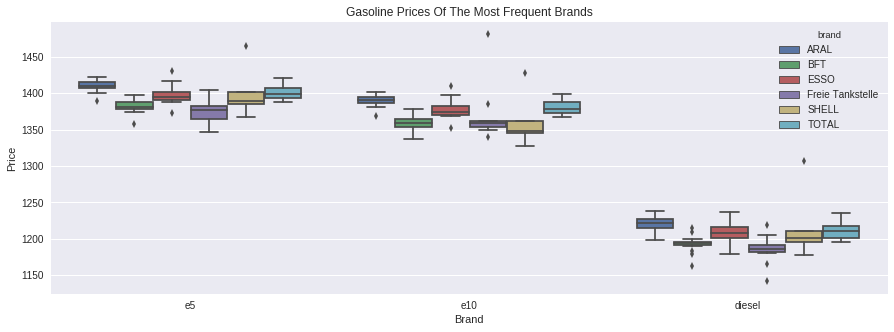

In [7]:
plt.figure(figsize=(15,5))
sns.boxplot(data=tmp, x='gasoline', y='price', hue='brand')
plt.title('Gasoline Prices Of The Most Frequent Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.savefig('build/Gasoline_Prices_By_Brand_Boxplot.png')
plt.show()

In [8]:
state = ts.groupby('state').mean().reset_index()
state.head()

,state,e5,e10,diesel
0,Baden-Württemberg,1390.798270,1368.560007,1215.613284
1,Bayern,1386.410162,1365.197172,1212.639270
2,Berlin,1383.661569,1360.507995,1193.767413
3,Brandenburg,1397.644286,1374.867833,1205.844277
4,Bremen,1390.929655,1367.966531,1197.631552


/home/jm/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


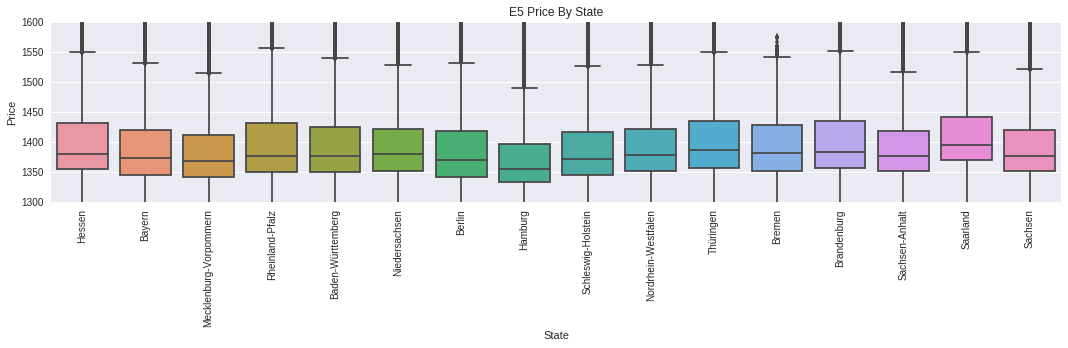

In [9]:
title = 'E5 Price By State'
fig = plt.figure(figsize=(15,5))
sns.boxplot(data=ts, x='state', y='e5')
plt.title(title)
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.ylim(1300, 1600)
plt.tight_layout()
plt.savefig('build/{}.png'.format(title.replace(' ', '_')))
plt.show()

In [10]:
ts.head()

,e5,e10,diesel,brand,state
date,,,,,
2018-04-21 00:00:00+02:00,1467.0,1447.0,1279.0,ARAL,Hessen
2018-04-21 00:00:00+02:00,1394.0,1354.0,1216.0,bft,Hessen
2018-04-21 00:00:00+02:00,1427.0,1407.0,1257.0,ARAL,Bayern
2018-04-21 00:00:00+02:00,1395.0,1375.0,1209.0,None,Mecklenburg-Vorpommern
2018-04-21 00:00:00+02:00,1382.0,1362.0,1217.0,BayWa,Bayern


In [21]:
tmp = ts.reset_index().head(100000)
tmp.head()

,date,e5,e10,diesel,brand,state
0,2018-04-21 00:00:00+02:00,1467.0,1447.0,1279.0,ARAL,Hessen
1,2018-04-21 00:00:00+02:00,1394.0,1354.0,1216.0,bft,Hessen
2,2018-04-21 00:00:00+02:00,1427.0,1407.0,1257.0,ARAL,Bayern
3,2018-04-21 00:00:00+02:00,1395.0,1375.0,1209.0,None,Mecklenburg-Vorpommern
4,2018-04-21 00:00:00+02:00,1382.0,1362.0,1217.0,BayWa,Bayern


In [41]:
a = tmp.pivot_table(index='date', columns='state', values='e5', aggfunc='mean').reset_index(drop=True)
a.head()

state,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,1398.930726,1390.516652,1396.609467,1412.677686,1388.160714,1361.849558,1400.791019,1387.030303,1390.690329,1398.341199,1405.213542,1410.807692,1397.653571,1395.863388,1377.584450,1413.240642
1,1402.475294,1395.433198,1401.059233,1415.730337,1395.715789,1369.014286,1405.479242,1379.325949,1389.888950,1401.030172,1408.835358,1421.929078,1397.915129,1397.557377,1375.177673,1411.939227
2,1401.395973,1392.329930,1400.086806,1413.699779,1391.510204,1359.757143,1403.781929,1392.236593,1394.667891,1401.690884,1404.218346,1412.206897,1396.981785,1403.016260,1386.608696,1416.697548
3,1400.109173,1392.761815,1396.916667,1410.909692,1390.886598,1363.095238,1403.305070,1392.715190,1392.682708,1402.189812,1402.997426,1416.813793,1397.696364,1405.727027,1389.850932,1412.360434
4,1400.061167,1392.120340,1400.256944,1410.713024,1387.551020,1369.731132,1405.893766,1391.034700,1394.496292,1399.811387,1407.198960,1409.765517,1395.574818,1406.856757,1384.238318,1416.210383
